# SOCIAL MEDIA SENTIMENT ANALYSIS (Twitter) - US AIRLINES

Sentiment analysis refers to analyzing an opinion or feelings about something using data linke text or images, regarding almost anything.  Sentiment Analysis helps companies in their decision-making  process.  For instance, if public sentiment towards a product is not so good, a company may try to modify the product or stop the production altogether in order to avoid any losses.

There are many sources of public sentiment Eg.Public interviews, opinion polls, surveys, etc.  However, with more and more people joining social media platforms, website like Twitter can be parsed for public sentiment.

# Problem definition:
Given tweets about six US Airlines, the task is to predict whether a tweet contains positive, negative or neutral sentiment abou the airline.  This is a typical Supervised Learning task where given a text string, we have to categorize the text string into predefined categories.

# Solution:
To solve this problem, we will follow the typical learning pipeline.  We will first import the required libraries and the dataset.  We will then do Exploratory Data Analysis (EDA) to see if we can find any trends in the dataset.  Next, we will perform text preprocessing to convert textual data to numeric adta that can be used by a Machine Learning algorithm.  Finally, we will use Machine Learning to train and test our Sentiment Analysis models.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import kaggle
import zipfile36 as zipfile
import re
import nltk

In [5]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

twitter-airline-sentiment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
zipfile_name = 'twitter-airline-sentiment.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [19]:
airline_tweets = pd.read_csv('Tweets.csv')

In [20]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [21]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

8.0
6.0


# Exploratory Data Analysis (EDA):

<Axes: ylabel='AIRLINES'>

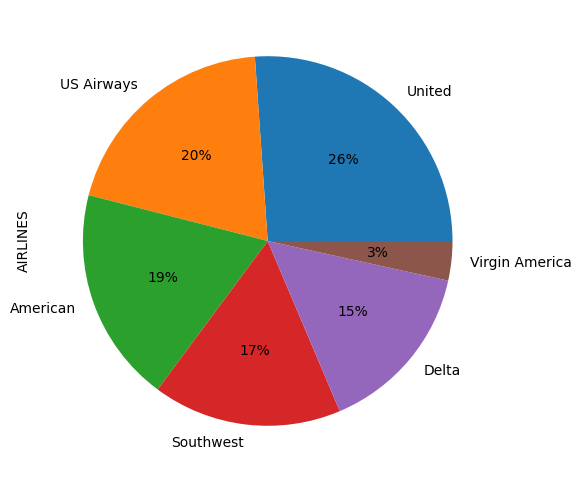

In [22]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct = '%1.0f%%', label='AIRLINES')

<Axes: title={'center': 'AIRLINE SENTIMENT'}, ylabel='COUNT'>

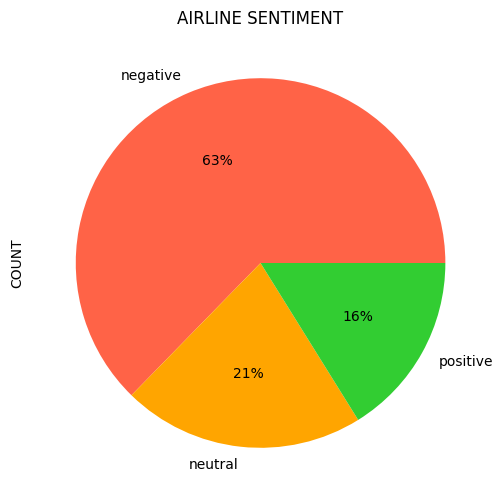

In [23]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie',  autopct='%1.0f%%', colors=['tomato', 'orange', 'limegreen'], title='AIRLINE SENTIMENT', ylabel='COUNT')

<Axes: xlabel='AIRLINES', ylabel='SENTIMENT COUNT'>

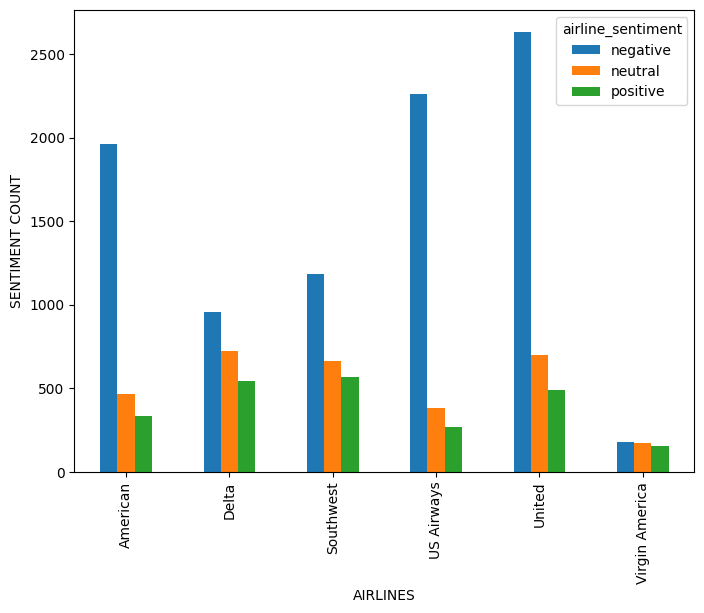

In [24]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar', xlabel='AIRLINES', ylabel='SENTIMENT COUNT')

__From the above observations, it is evident that for almost all the airlines, the majority of the tweets are "NEGATIVE", followed by "NEUTRAL" and "POSITIVE" tweets.  "VIRGIN AMERICA" is probably the only airline where the ratio of all three sentiments are somewhat similar.__

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

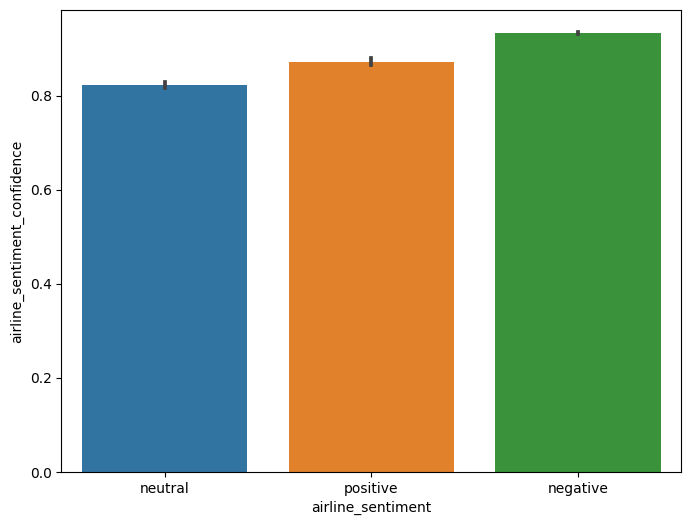

In [25]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline_tweets)

__From the above graph, we can see that the confidence level for negative tweets is higher compared to positive & neutral tweets.__

# Data Cleaning:

In [26]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [27]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

# Term Frequency - Inverse Document Frequency:

TF = (Frequency of a word in the document) / (Total words in the document)

IDF = Log((Total number of docs) / (Number of docs containing the word))

In [28]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

max_feature --> 2500 most frequently occurring words to create a bag of words feature vector.

min_df --> Words that occur in a maximum of 80% of the documents.

max_df --> Words that occur in at least 7 documents.

# Dividing data into Training and Test Sets:

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

# Model building and training:

In [31]:
predictions = text_classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
accuracy score 0.7599043715846995
